In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants

precision = 1e-5

def gradient_descent(target_function, gradient_function, x0, linear_search, terminate_condition):
    points = [x0]
    while not terminate_condition(target_function, points):
        last_point = points[-1]
        g = np.array(gradient_function(last_point))
        if np.linalg.norm(g) == 0:
            return points
        next_point = last_point - g * linear_search(lambda l: target_function(last_point - g * l), lambda l: -np.dot(g, gradient_function(last_point - g * l)))
        points.append(next_point)
    return points

def find_upper_bound(f):
    original = f(0)
    r = 1
    while f(r) < original:
        r *= 2
    return r


def fixed_step_search(step_length):
    return lambda f, derivative: step_length

def bin_search(f, derivative):
    # assume derivative(0) < 0 and derivative is rising
    l = 0
    r = find_upper_bound(f)

    while r - l > precision:
        m = (l + r) / 2
        if derivative(m) < 0:
            l = m
        else:
            r = m
    return r

def golden_ratio_search(f, derivative):
    l = 0
    r = find_upper_bound(f)

    while r - l > precision:
        delta = (r - l) / scipy.constants.golden
        x1, x2 = r - delta, l + delta
        if f(x1) < f(x2):
            r = x2
        else:
            l = x1
    return r

def fibonacci_search(n_iters):
    def search(f, derivative):
        l = 0
        r = find_upper_bound(f)
        length = r - l
        fibs = [1, 1]
        while len(fibs) <= n_iters:
            fibs.append(fibs[-1] + fibs[-2])
        x1 = l + length * fibs[-3] / fibs[-1]
        x2 = l + length * fibs[-2] / fibs[-1]
        y1, y2 = f(x1), f(x2)
        for k in range(n_iters - 2):
            if f(x1) > f(x2):
                l = x1
                x1 = x2
                x2 = l + (r - l) * fibs[-k - 3] / fibs[-k - 2]
                y1, y2 = y2, f(x2)
            else:
                r = x2
                x2 = x1
                x1 = l + (r - l) * fibs[-k - 4] / fibs[-k - 2]
                y1, y2 = f(x1), y1

        return r
    return search


[[-20.          20.        ]
 [  5.21598581  17.37753748]
 [  4.18043169   7.42641923]
 [  5.00709278   7.34039732]
 [  4.97308933   7.01401798]
 [  5.00023329   7.01119008]
 [  4.99911491   7.00046129]
 [  5.00000769   7.00036823]
 [  4.99997084   7.00001521]
 [  5.00000025   7.00001215]
 [  4.99999904   7.0000005 ]
 [  5.00000001   7.0000004 ]
 [  4.99999997   7.00000002]
 [  5.           7.00000001]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]]


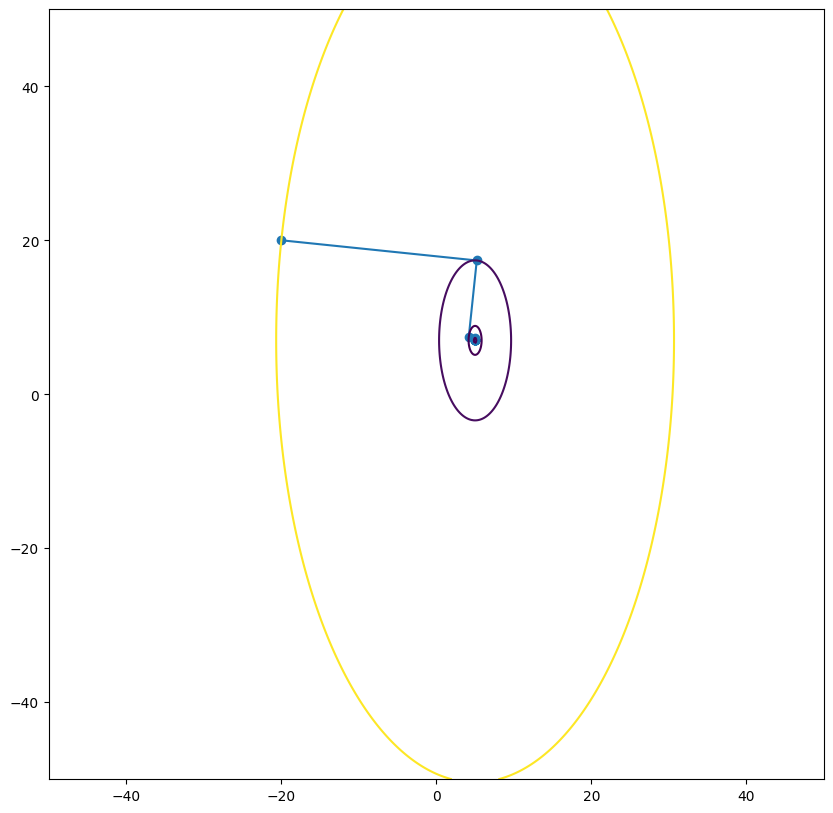

In [2]:
plt.rcParams["figure.figsize"] = (10,10)
t = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(t, t)

alpha = 5
def f(x):
    return alpha * (x[0] - 5) ** 2 + (x[1] - 7) ** 2

def grad(x):
    return [2 * alpha * (x[0]  - 5), 2 * (x[1] - 7)]

points = np.array(gradient_descent(f, grad, [-20, 20], fibonacci_search(30), lambda f, points: len(points) > 20))
print(points)

plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f([X, Y]), levels=sorted(set([f(p) for p in points])))

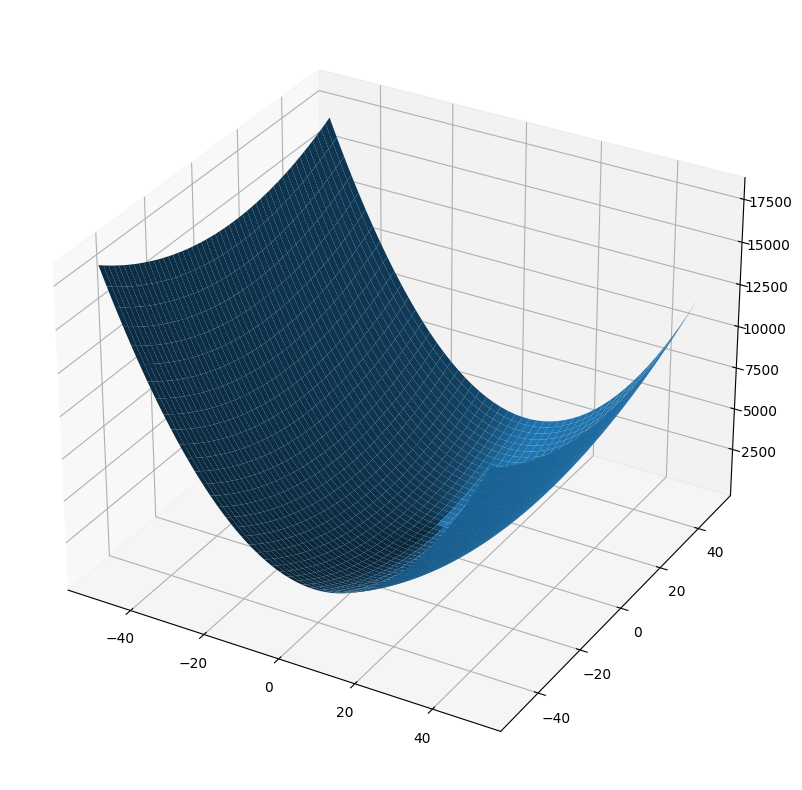

In [3]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f([X, Y]))